## Data Gathering Stage

In [1]:

# Importing the essential packages needed for this task
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Importing data from Box Office Mojo in order to get movie revenues
bom_data = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
bom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
! ls


CONTRIBUTING.md
LICENSE.md
Phase 1 Project.ipynb
README.md
Untitled-Copy1.ipynb
Untitled.ipynb
awesome.gif
im.db
movie_data_erd.jpeg
student.ipynb
zippedData
zippedData.im
zippedData.sqlite


In [5]:
#Importing IMDB database in order to explore movie genres and ratings
conn = sqlite3.connect('im.db')
cur = conn.cursor()

cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [6]:
#Exploring the movie_basics table from IMDB
pd.read_sql('''SELECT * FROM movie_basics;''', conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [7]:
#Exploring the movie_ratings table from IMDB
pd.read_sql('''SELECT * FROM movie_ratings;''', conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


## Starting data exploration for BOM


In [8]:
#bom_data[total_revenue] = float(bom_data['domestic_gross'])+ float(bom_data['foreign_gross'])
#bom_data
bom_data.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [9]:
bom_data.shape

(3387, 5)

In [10]:
#changing NAN to 0 for foreign_gross. Rationale: some movies were not internationally distributed but we do not want to lose 
# the information for those who were, so we will add the foreign gross to those who had any to the total revenues 

bom_data['foreign_gross'] = bom_data['foreign_gross'].map(lambda x: 0 if x is np.nan else x)
bom_data.isna().sum()

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [11]:
#discarding movies with no domestic revenues or studio: marginal information loss (max 33 candidates)
bom_data.dropna(inplace = True)
bom_data.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [12]:
#Preparing to transform foreign_gross into float numbers after getting rid of the ','
print(bom_data.info())
bom_data['foreign_gross'] = bom_data['foreign_gross'].map(lambda x: str(x).replace(',',''))
bom_data['foreign_gross'] = bom_data['foreign_gross'].map(lambda x: float(x))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB
None


In [13]:
#Creating a new column for total revenue
bom_data['total_revenues'] = bom_data['foreign_gross'] + bom_data['domestic_gross']
print(bom_data['total_revenues'].head())


0    1.067000e+09
1    1.025500e+09
2    9.603000e+08
3    8.283000e+08
4    7.526000e+08
Name: total_revenues, dtype: float64


In [14]:

bom_data.head(10)

,title,studio,domestic_gross,foreign_gross,year,total_revenues
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08
7,Tangled,BV,200800000.0,391000000.0,2010,5.918000e+08
8,Despicable Me,Uni.,251500000.0,291600000.0,2010,5.431000e+08
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08


## Starting data exploration for IMDB

In [15]:
#Joining the two tables on movie-id and transforming the results into a pd DataFrame to facilitate data analysis
imdb = pd.DataFrame(pd.read_sql('''SELECT * FROM movie_ratings
LEFT JOIN movie_basics
USING(movie_id)

ORDER BY averagerating DESC;''', conn))
imdb


,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt5390098,10.0,5,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary
1,tt6295832,10.0,5,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary
2,tt1770682,10.0,5,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary"
3,tt2632430,10.0,5,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary
4,tt8730716,10.0,5,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary
...,...,...,...,...,...,...,...,...
73851,tt7926296,1.0,17,Nakhodka interneta,Nakhodka interneta,2017,162.0,Drama
73852,tt3235258,1.0,510,My First Love,Hatsukoi,2013,82.0,Drama
73853,tt7831076,1.0,96,"Yes, Sir! 7","Yes, Sir! 7",2016,111.0,"Comedy,Drama"
73854,tt3262718,1.0,223,Bye Bye Marrano,Bye Bye Marrano,2013,114.0,Drama


In [16]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [17]:
imdb['genres'].value_counts()

Drama                      11612
Documentary                10313
Comedy                      5613
Horror                      2692
Comedy,Drama                2617
                           ...  
Biography,Family,Sport         1
Biography,Comedy,Horror        1
Sport,Thriller                 1
Adventure,Crime,Western        1
Adventure,Romance,Sport        1
Name: genres, Length: 923, dtype: int64

In [18]:
#Dealing with NAN data for Genres
print(imdb.isna().sum())

imdb['genres'] = imdb['genres'].map(lambda x: 'No genre' if x is np.nan else str(x))
                                    
print(imdb.isna().sum())

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64
movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres                0
dtype: int64


In [19]:
#In order to deal with multi genre classification, I decided to chose the first Genre as the representative one
#Alternative option would be to count the movie under each of the Genres quoted
imdb['genres_clean'] = imdb['genres'].map(lambda x: x.split(',', 1)[0])
print(imdb['genres_clean'].unique())
imdb['genres_clean'].head()

['Documentary' 'Crime' 'Drama' 'Adventure' 'Comedy' 'Biography' 'Action'
 'Animation' 'Thriller' 'Musical' 'None' 'War' 'Music' 'History' 'Sport'
 'Family' 'Horror' 'Mystery' 'Fantasy' 'Sci-Fi' 'Romance' 'Western'
 'Game-Show' 'News' 'Reality-TV' 'Adult']


0    Documentary
1    Documentary
2          Crime
3    Documentary
4    Documentary
Name: genres_clean, dtype: object

In [20]:
# Getting an intuition of what are the most popular (in this case = best rated) genres
table = pd.pivot_table(imdb, index='genres_clean', values='averagerating',aggfunc=np.mean ).sort_values(by='averagerating', ascending=False)
table

,averagerating
genres_clean,
Game-Show,9.000000
Music,7.506771
Documentary,7.316595
Biography,7.174512
Sport,6.944944
Musical,6.637255
None,6.496144
History,6.413235
Adventure,6.386710


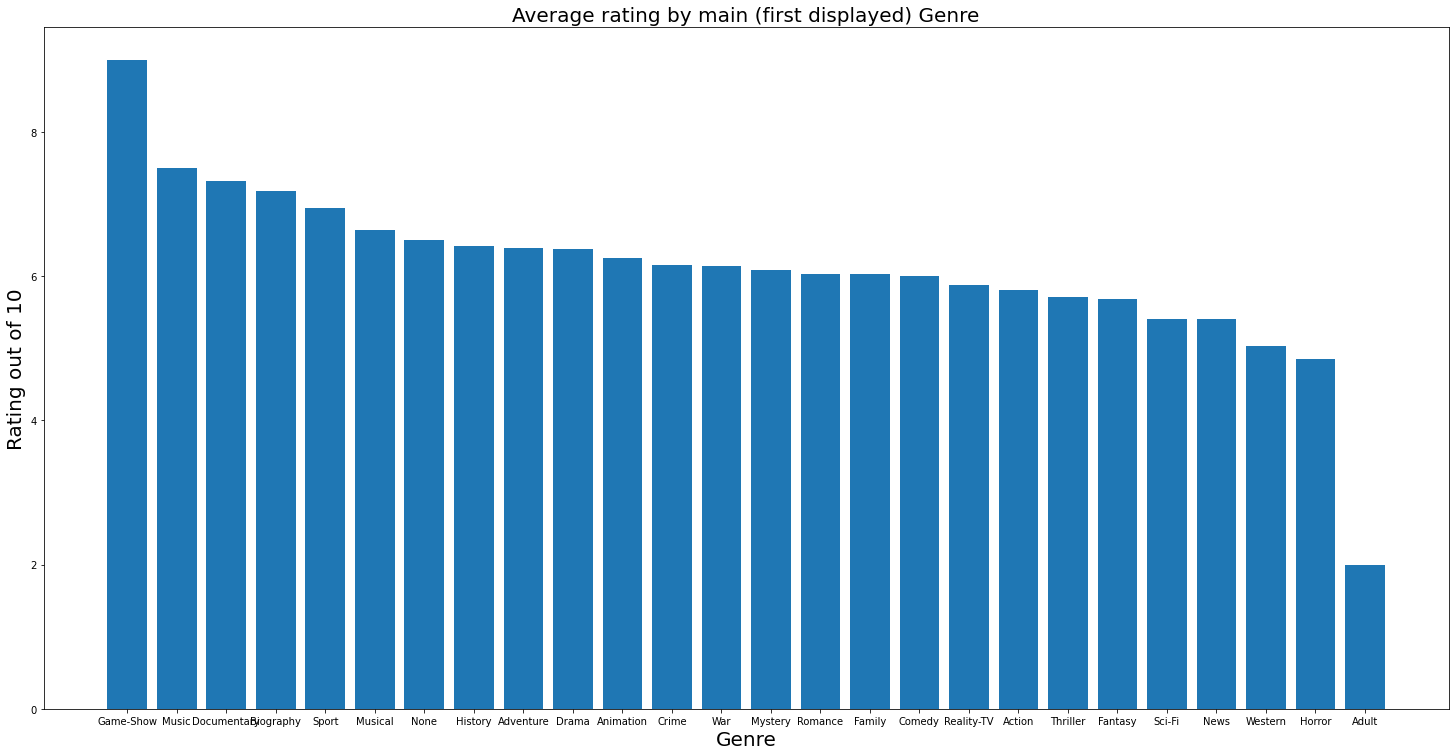

In [21]:
fig, ax = plt.subplots(figsize =(20,10))
ax.bar(table.index, table['averagerating'])
fig.tight_layout()
ax.set_title('Average rating by main (first displayed) Genre', fontsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('Rating out of 10', fontsize=20)
plt.show()

## Starting data exploration for commonalities between the 2 dataframe

In [22]:
#checking the difference between primary and original title, we will discount the original, often foreign language
print((imdb['primary_title'] != imdb['original_title']).value_counts()) 
print(imdb[imdb['primary_title'] != imdb['original_title']][['primary_title','original_title']])

False    61683
True     12173
dtype: int64
                             primary_title  \
0      The Paternal Bond: Barbary Macaques   
38                               Blackbear   
80               Birds of the Lakes Return   
127                The Children of Genghis   
199              Ugo Dossi - Art and Space   
...                                    ...   
73841                       Pick the Youth   
73842          Good Morning to the World!!   
73844                         A Rain Woman   
73852                        My First Love   
73855                      Cherry Blossoms   

                                          original_title  
0      Atlas Mountain: Barbary Macaques - Childcaring...  
38                                            Submission  
80                          Ptice jezer, njihova vrnitev  
127                                  Chingisiin huuhduud  
199                        Ugo Dossi: Kunst und Weltraum  
...                                               

In [23]:
#Merging the dataframes in oorder to study correlation between Revenues, Genre and Rating
mix_df = pd.merge(bom_data, imdb, left_on ='title', right_on = 'primary_title')[['title','total_revenues','averagerating', 'genres_clean']]
mix_df

,title,total_revenues,averagerating,genres_clean
0,Toy Story 3,1.067000e+09,8.3,Adventure
1,Inception,8.283000e+08,8.8,Action
2,Shrek Forever After,7.526000e+08,6.3,Adventure
3,The Twilight Saga: Eclipse,6.985000e+08,5.0,Adventure
4,Iron Man 2,6.239000e+08,7.0,Action
...,...,...,...,...
2999,Souvenir,1.140000e+04,6.0,Drama
3000,Souvenir,1.140000e+04,5.9,Comedy
3001,Beauty and the Dogs,8.900000e+03,7.0,Crime
3002,The Quake,6.200000e+03,6.2,Action


In [24]:
#Revenues per Genre
revenues_per_genre = pd.pivot_table(mix_df, index='genres_clean', values='total_revenues',aggfunc=np.mean ).sort_values(by='total_revenues', ascending=False)
revenues_per_genre

,total_revenues
genres_clean,
Sci-Fi,4.109890e+08
Adventure,2.118796e+08
Family,1.844078e+08
Action,1.661492e+08
None,1.181543e+08
Fantasy,1.132824e+08
Animation,9.010507e+07
Mystery,7.591370e+07
Horror,7.400622e+07


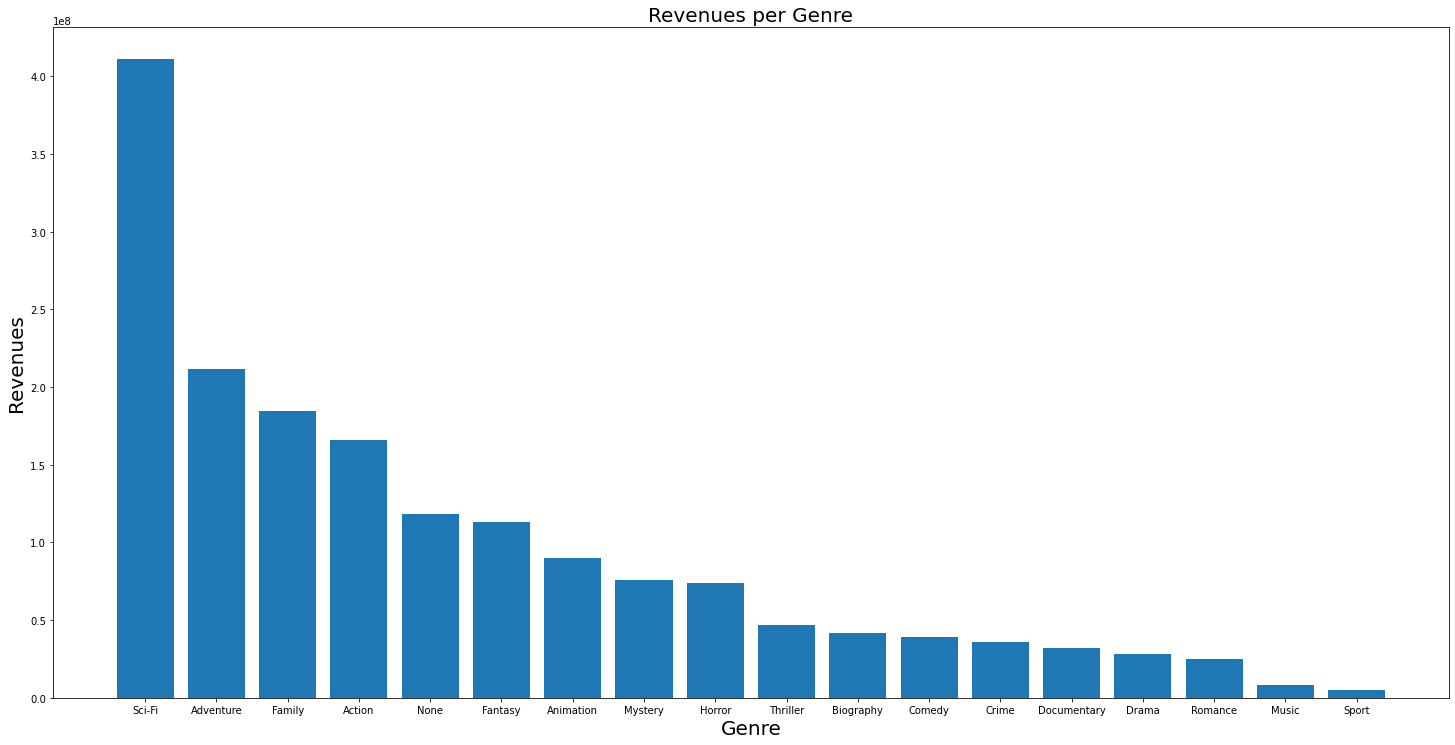

In [25]:
fig, ax = plt.subplots(figsize =(20,10))
ax.bar(revenues_per_genre.index, revenues_per_genre['total_revenues'])
fig.tight_layout()
ax.set_title('Revenues per Genre', fontsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('Revenues', fontsize=20)
plt.show()

In [26]:
#testing distribution for biggest 100 movies
top_100 = mix_df.head(100)

#Revenues per Genre
top_100_revenues =pd.pivot_table(top_100, index='genres_clean', values='total_revenues',aggfunc=np.mean ).sort_values(by='total_revenues', ascending=False)
top_100_revenues

,total_revenues
genres_clean,
Animation,5.431000e+08
Adventure,3.623077e+08
Mystery,2.948000e+08
Action,2.323242e+08
None,2.290500e+08
Biography,2.063342e+08
Thriller,1.990000e+08
Documentary,1.678000e+08
Drama,1.284733e+08


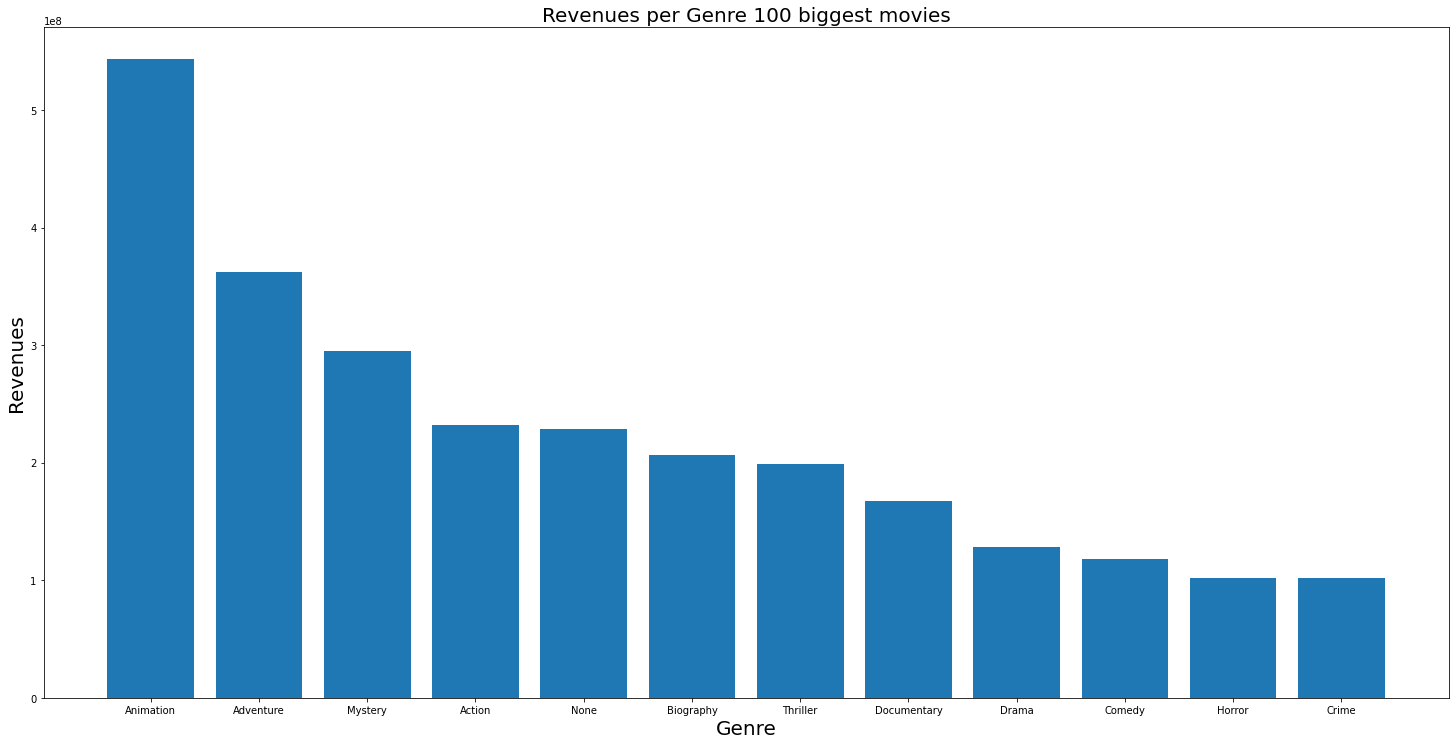

In [27]:
#Testing correlation between genres and revenues for top 100 movies (in revenue terms)
fig, ax = plt.subplots(figsize =(20,10))
ax.bar(top_100_revenues.index, top_100_revenues['total_revenues'])
fig.tight_layout()
ax.set_title('Revenues per Genre 100 biggest movies', fontsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('Revenues', fontsize=20)
plt.show()

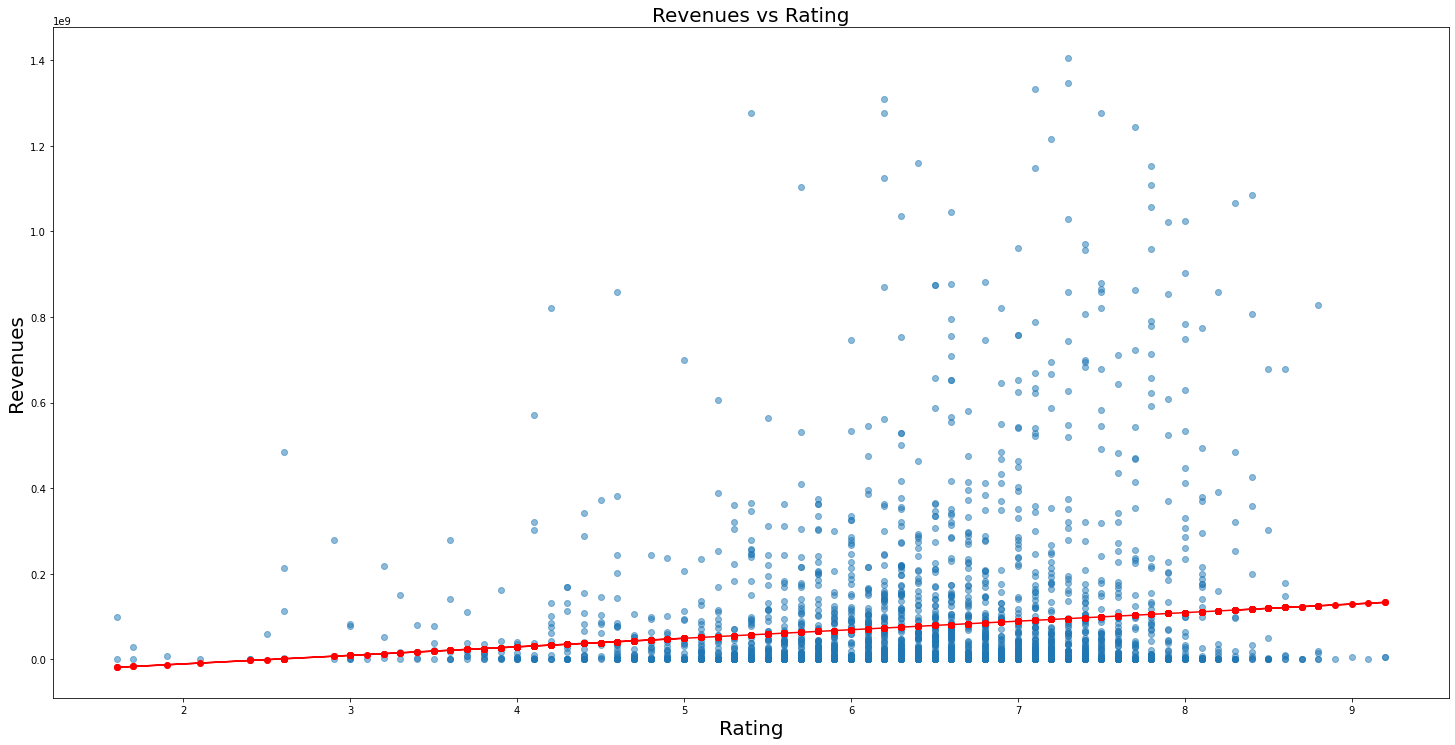

In [28]:
##Testing correlation between Rating and revenues for top all movies 
fig, ax = plt.subplots(figsize =(20,10))

ax.scatter( mix_df['averagerating'], mix_df['total_revenues'] , cmap='viridis', alpha=0.5 )
fig.tight_layout()

z = np.polyfit(mix_df['averagerating'], mix_df['total_revenues'],1)
p = np.poly1d(z)
plt.plot(mix_df['averagerating'],p(mix_df['averagerating']),"r-o")

ax.set_title('Revenues vs Rating', fontsize=20)
ax.set_xlabel('Rating', fontsize=20)
ax.set_ylabel('Revenues', fontsize=20)
plt.show()

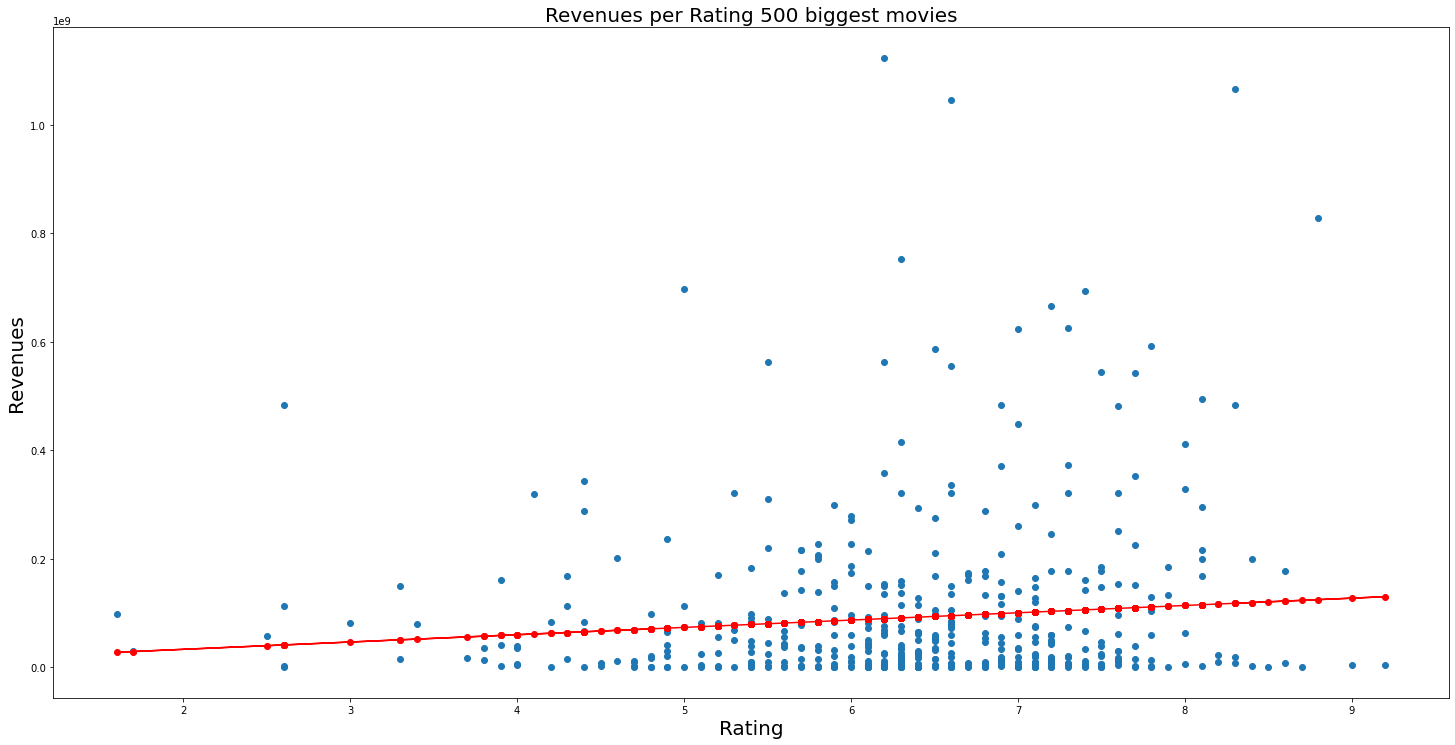

In [29]:
#Testing correlation between rating and revenues for top 500 movies (in revenue terms)
top_500 = mix_df.head(500)

fig, ax = plt.subplots(figsize =(20,10))
ax.scatter(top_500['averagerating'],top_500['total_revenues'] )
fig.tight_layout()


z = np.polyfit(top_500['averagerating'], top_500['total_revenues'],1)
p = np.poly1d(z)
plt.plot(top_500['averagerating'],p(top_500['averagerating']),"r-o")
#plt.xlim(0,10)


ax.set_title('Revenues per Rating 500 biggest movies', fontsize=20)
ax.set_xlabel('Rating', fontsize=20)
ax.set_ylabel('Revenues', fontsize=20)


plt.show()



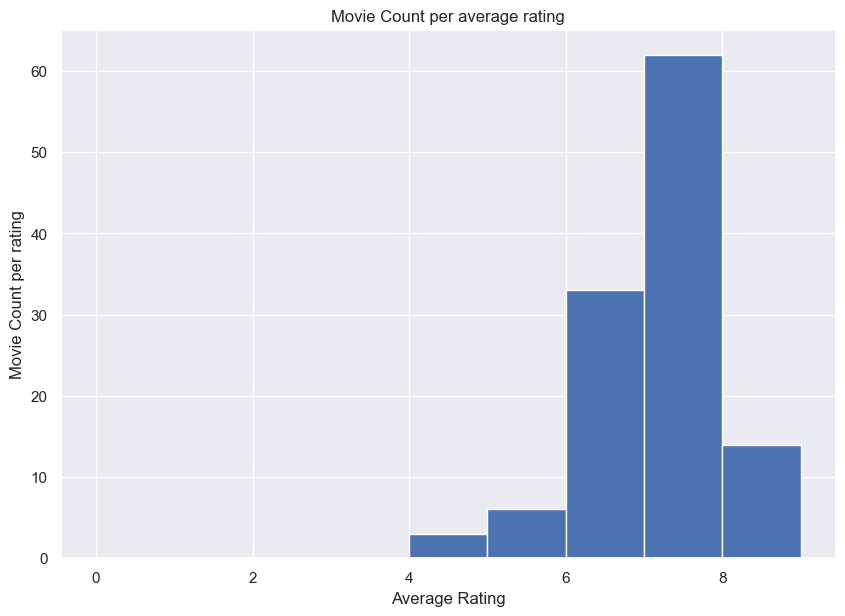

In [113]:
#Rating vs Revenues for high Revenues movies (>$500 million)
big_movies = mix_df[mix_df['total_revenues'] > 500000000]
corr=  {np.round(np.corrcoef(big_movies['averagerating'],big_movies['total_revenues'])[0,1], 2)}
#print(corr)



fig = plt.figure(figsize =(10, 7))

plt.hist(big_movies['averagerating'], bins = np.arange(0,10))

plt.xlabel('Average Rating') 
plt.ylabel('Movie Count per rating') 
plt.title("Movie Count per average rating")


plt.show()